# 1. 머신러닝용 파이썬 패키지

## 1-1 numpy 패키지¶
- numpy(“넘파이”라고 읽는다) 패키지는 파이썬에서 수치 해석, 특히 선형대수 계산 기능을 제공한다. 
- 자료형이 고정된 다차원 배열 클래스(n-dimensional array)와 벡터화 연산(vectorized operation)을 지원하며 
  수학 연산에서 가장 기본적이고 중요한 패키지다

In [1]:
import numpy as np

## 1-2 pandas 패키지¶
- pandas(“판다스” 또는 “팬더스”라고 읽는다) 패키지는 테이블 형태의 데이터를 다루는 데이터프레임(DataFrame) 자료형을 제공한다. 
- 자료 탐색과 정리에 아주 유용하여 데이터 분석에 빠질 수 없는 필수 패키지다. 
- 원래는 R 언어에서 제공하는 데이터프레임 자료형을 파이썬에서 제공할 목적이었으나 더 다양한 기능이 추가되었다.

In [2]:
import pandas as pd

## 1-3 scikit-learn 패키지¶
- scikit-learn(“사이킷런”이라고 읽는다) 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지다. 
- scikit-learn 패키지의 장점은 다양한 머신러닝 모형을 하나의 패키지에서 모두 제공하고 있다는 점이다. 

In [3]:
import sklearn as sk

## 1-3-1 model_selection :
- 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼파라미터 튜닝을 위한 다양한 함수와 클래스를 제공

## 1-3-1-1 학습/테스트 데이터 세트 분리 : train_test_split()

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습된 데이터로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


### train_test_split() 의 파라미터
- test_size : 전체 데이터 세트에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인지 결정, 기본값 : 0.25
- train_size : 전체 데이터 세트에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인지 결정, test_size를 주로 사용해서 잘 쓰는 파라미터는 아님
- shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 기본값은 True, 데이터를 분산시켜 보다 효율적인 학습/테스트 데이터 세트를 만드는데 사용
- random_state : 난수 값을 지정하면 여러번 다시 수행해도 동일한 결과가 나오게 해줌

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size = 0.3, 
                                                    random_state=121)

### 학습용 데이터를 기반으로 DecisionTreeClassifier를 학습하고 모델을 이용해 예측 정확도를 측정

In [6]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


## 1-3-1-2 cross_val_score() : 교차 검증을 보다 간단히게


- 폴드 세트 설정, 루프 반복으로 학습 및 테스트 데이터의 인덱스를 추출,  반복적으로 학습과 예측을 수행 과정을 한꺼번에 수행해주는 API

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표는 정확도(accuracy), 교차검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, cv =3 , scoring = 'accuracy')
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


## 1-3-2 preprocessing : 데이터 인코딩

## 1-3-2-1 레이블 인코딩(Label Encoding)

- 카테고리 피처를 코드형 숫자로 변환

- LabelEncoder 클래스로 구현: 객체 생성 후 fit(), transform()

In [8]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변화값: ', labels)

인코딩 변화값:  [0 1 4 5 3 3 2 2]


In [9]:
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [10]:
print('디코딩 원본 값: ', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

디코딩 원본 값:  ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


## 1-3-2-2 원-핫 인코딩(One-Hot Encoding)

- 바로 위에서 이야기한 레이블 인코딩의 문제점을 해결하기 위한 방식으로 OneHotEncoder 클래스로 쉽게 변환
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지에는 0으로 표시하는 방법
- 주의점 :  OneHotEncoder 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환이 되어 있어야 함, 입력값으로 2차원 데이터가 필요함

In [11]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전기레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)
print(labels)

[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]


### 원-핫 인코딩을 적용

In [12]:
oh_encoder = OneHotEncoder(categories='auto')
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('\n원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원-핫 인코딩 데이터 차원
(8, 6)


### get_dummies() : 판다스에서 이용할 수 있는 원핫 인코딩 API
- 사이킷런의 OneHotEncoder와는 달리 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환됨

In [13]:
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [14]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 1-3-3  preprocessing : 피처 스케일링과 정규화

- 피처 스케일링(Feature Scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업(표준화, 정규화 등)

- 표준화(Standardization) : 데이터 피처의 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환

- 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (즉, 개별 데이터 크기를 모두 똑같은 단위로 변경)

## 1-3-3-1 StandardScaler
    : 표준화를 쉽게 지원하기 위한 클래스로 개별 피처를 평균이 0, 분산이 1인 값으로 변환

In [15]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트 로딩하고 데이터 프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.preprocessing import StandardScaler

# Scaler 객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 세트변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)


### transform() 변환시 스케일 변환된 데이터세트가 Numpy ndarray로 반환되 이를 데이터 프레임으로 변환

In [17]:
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## 1-3-3-2 MinMaxScaler
    : 데이터값을 0과 1사이의 범위 값으로 변환(음수값이 있으면 -1에서 1값으로 변환)


In [18]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

### transform()시 스케일 변환된 데이터세트가 Numpy ndarray로 변환되어 이를 DataFrame으로 변환

In [19]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## 1-3-3-3 정규화(Normalization) : 

- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (즉, 개별 데이터 크기를 모두 똑같은 단위로 변경)

In [20]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
# print(california_housing.DESCR)

x_array = np.array(california_housing.data['HouseAge'])
print("HouseAge array: ",x_array)

HouseAge array:  [41. 21. 52. ... 17. 18. 16.]


In [21]:

normalized_arr = preprocessing.normalize([x_array])
print("Normalized HouseAge array: ",normalized_arr)

Normalized HouseAge array:  [[0.00912272 0.00467261 0.01157028 ... 0.00378259 0.0040051  0.00356009]]


## 1-4  회귀분석 모델 

## 머신러닝에서 회귀분석의 의미

 - 회귀분석은 종속 변수(목표)와 하나 이상의 독립 변수(예측 변수라고도 함) 간의 미래 사건을 예측하는 방법이다. 
    예를 들면, 난폭운전과 운전자에 의한 교통사고 총 건수 사이의 상관관계를 예측하거나 비즈니스 상황에서는 특정 금액을 광고에 사용했을 때와 
    그것이 판매에 미치는 영향 사이의 관계를 예측하는 데 사용할 수 있다.

### 회귀분석은 머신러닝의 일반적인 모델 중 하나이다. 

- 회귀분석 모델은 수치적 가치를 추정한다는 측면에서 관측치가 어느 범주에 속하는지를 식별하는 분류 모델과 다르다.


## 회귀분석이 중요한 이유

회귀분석은 실제 응용 프로그램에서 넓게 활용되고 있다. 연속 숫자를 포함하는 모든 머신러닝 문제 해결에 필수적이며, 
여기에는 다음을 비롯한 많은 예가 포함된다:

- 금융 관련 예측(주택 가격 또는 주가)
- 판매 및 프로모션 예측
- 자동차 테스트
= 날씨 분석 및 예측
- 시계열 예측

회귀분석은 두 개 이상의 변수 사이에 유의미한 관계가 존재하는지 여부를 알려줄 뿐만 아니라 그 관계성에 대한 보다 구체적인 정보를 제공할 수 있다.
특히, 여러 변수가 종속 변수에 미치는 영향의 강도를 추정할 수 있다. 
만약 한 변수(가령 가격)의 값을 변경하면 회귀분석을 통해 종속 변수(판매)에 어떤 영향을 미칠지 알 수 있다.

# 2.  실습 : 보험 청구에 대한 데이터 분석 

## 2-1 데이터 가져오기 

In [4]:
import pandas as pd

### path를 지정

In [1]:
file_url_2 = "./data/insurance.csv"

In [2]:
##file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv"

### 판다스의 함수로 파일을 읽는다.

In [7]:
data = pd.read_csv(file_url_2)

In [6]:
## data.to_csv("./data/insurance.csv", index=False)

### 데이터 형태를 확인한다

In [24]:
data.shape

(1338, 6)

### 데이터 구성확인

- 6개 칼럼으로 구성
- charges는 타켓으로 처리

In [8]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


### 데이터의 정보 확인
- 칼럼과 널값 확인
- 자료형 확인
- 전체 메모리 사용량 확인 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### 데이터의 통계 확인 

In [27]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


## 2-2 데이터 전처리 

### 변수와 타켓을 분리 

In [28]:
X = data[['age','sex','bmi','children','smoker']]

In [29]:
y = data['charges']

### 데이터를 훈련과 테스트로 분리 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 2-3 모델 선택하기

## 선형회귀 모델

- 머신러닝에서 가장 일반적인 회귀분석 유형이라고 할 수 있는 선형 회귀는 예측 변수와 종속 변수로 구성되며, 
이 둘은 선형 방식으로 서로 연관지어져 있다. 선형 회귀는 위에서 설명한 대로 가장 적합한 선, 즉 최적적합선을 사용한다.

- 변수들이 서로 선형적으로 연결되어 있는 경우 선형 회귀를 사용한다. 광고 지출 증가가 판매에 미치는 영향을 예측할 때 등이 예가 될 수 있다. 
그러나 선형 회귀분석은 특이치에 영향을 받기 쉬우므로 빅데이터 집합을 분석하는 데 사용해서는 안 된다.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

## 모델 훈련 

In [34]:
model.fit(X_train, y_train)

LinearRegression()

## 모델 검증

In [35]:
pred = model.predict(X_test)

## 예측과 검증 상태 확인 

In [36]:
comparison = pd.DataFrame({'actual' : y_test, 'pred': pred})

In [37]:
comparison

,actual,pred
764,9095.06825,8554.817116
887,5272.17580,6973.587467
890,29330.98315,36798.604161
1293,9301.89355,9417.882823
259,33750.29180,26871.680311
...,...,...
109,47055.53210,39220.995889
575,12222.89830,11695.634124
535,6067.12675,7253.598675
543,63770.42801,40950.539904


In [38]:
comparison.shape

(268, 2)

In [39]:
(comparison['actual'] > comparison['pred']).sum()

96

In [40]:
(comparison['actual'] < comparison['pred']).sum()

172

## 시각화 

In [41]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='actual', ylabel='pred'>

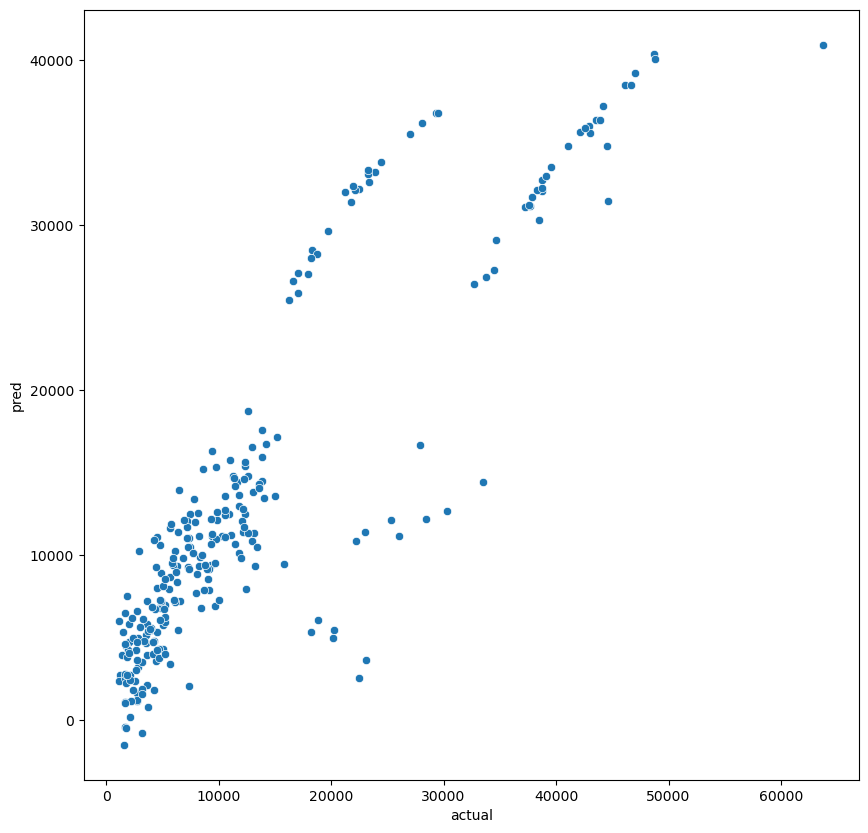

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='actual', y='pred', data=comparison)

## 평가 : RMSE

In [44]:
from sklearn.metrics import mean_squared_error 

In [45]:
mean_squared_error(y_test, pred)

33979257.050808206

In [46]:
mean_squared_error(y_test, pred, squared=False)

5829.172930254189

In [47]:
np.sqrt(mean_squared_error(y_test, pred))

5829.172930254189

## 평가 : R2 

In [48]:
from sklearn.metrics import r2_score

In [49]:
model.score(X_train, y_train)

0.7410888590280913

In [50]:
r2_score(y_test, pred)

0.7811302113434097

# 3.  실습 : 보험 청구에 대한 데이터 분석 => 다른 모델

## 3-1 리지 모델


- 릿지 회귀분석은 선형회귀분석의 과대적합 문제를 해소하기 위해 L2 규제를 적용하는 방식을 사용합니다.
- 차이가 있다면 라쏘는 가중치들이 0이 되지만, 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다. 특성이 많은데 그중 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델을 찾아줄 것이다.

In [51]:
from sklearn.linear_model import Ridge

### 모델생성

In [52]:
model_ri = Ridge()

### 모델훈련

In [53]:
model_ri.fit(X_train, y_train)

Ridge()

### 모델검증

In [54]:
pred_ri = model_ri.predict(X_test)

### 모델평가

In [55]:
mean_squared_error(y_test, pred_ri, squared=False)

5832.6034766952735

In [56]:
r2_score(y_test, pred_ri)

0.7808725199267703

## 3-2 라소모델 

- 기존의 선형 회귀에선 적절한 가중치와 편향을 찾아내는 것이 관건이었다. 
- 라쏘는 거기에 추가적인 제약 조건을 준다. 바로 MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다는 것이다. 다시 말해, 가중치의 모든 원소가 0이 되거나 0에 가깝게 되도록 해야 한다. 
- 따라서 어떠한 특징들은 모델을 만들 때 사용되지 않기도 한다. 어떤 벡터 요소의 절댓값의 합은 L1-norm이다. 즉, 라쏘는 L1-norm 페널티를 가진 선형 회귀 방법이다.

In [57]:
from sklearn.linear_model import Lasso

### 모델생성

In [58]:
model_la = Lasso()

### 모델훈련

In [59]:
model_la.fit(X_train, y_train)

Lasso()

### 모델검증

In [60]:
pred_la = model_la.predict(X_test)

### 모델평가

In [61]:
mean_squared_error(y_test, pred_la, squared=False)

5829.456231198553

In [62]:
r2_score(y_test, pred_la)

0.7811089364471855

## 3-3 엘라스틱넷 모델 

- 정규화 선형회귀의 일종으로 선형회귀 계수에 대한 제약 조건을 추가하여 모델이 과도하게 최적하게 현상(과적합, overfitting)을 막는 방법입니다. 

- 다른 정규화 선형회귀인 릿지회귀(Ridge Regression)과 라쏘회귀(Lasso Regression)을 절충한 모델입니다. 



In [63]:
from sklearn.linear_model import ElasticNet

### 모델생성

In [64]:
model_el = ElasticNet()

### 모델훈련

In [65]:
model_el.fit(X_train, y_train)

ElasticNet()

### 모델 예측

In [66]:
pred_el = model_el.predict(X_test)

### 모델 평가 

In [67]:
mean_squared_error(y_test, pred_el, squared=False)

9506.938108117973

In [68]:
r2_score(y_test, pred_el)

0.4178253740103828